In [24]:
import numpy as np
import pandas as pd 
from sklearn import tree


In [25]:
df = pd.read_csv("./PastHires.csv", header=0)

In [26]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [27]:
#normalisation

d = {"Y":1, "N": 0}
df['Hired'] = df['Hired'].map(d)
df["Employed?"] = df["Employed?"].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)



In [28]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0


In [29]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0
5,0,0,0,PhD,1,1,1
6,5,1,2,MS,0,1,1
7,3,0,1,BS,0,1,1
8,15,1,5,BS,0,0,1
9,0,0,0,BS,0,0,0


In [30]:
d1 = {"BS":0,"MS":1,"PhD":2}

In [31]:
df['Level of Education'] = df['Level of Education'].map(d1)

In [32]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [33]:
features = list(df.columns[:-1])

In [34]:
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [35]:
y = df["Hired"]
x = df[features]
classifier = tree.DecisionTreeClassifier()
classifier.fit(x, y)

DecisionTreeClassifier()

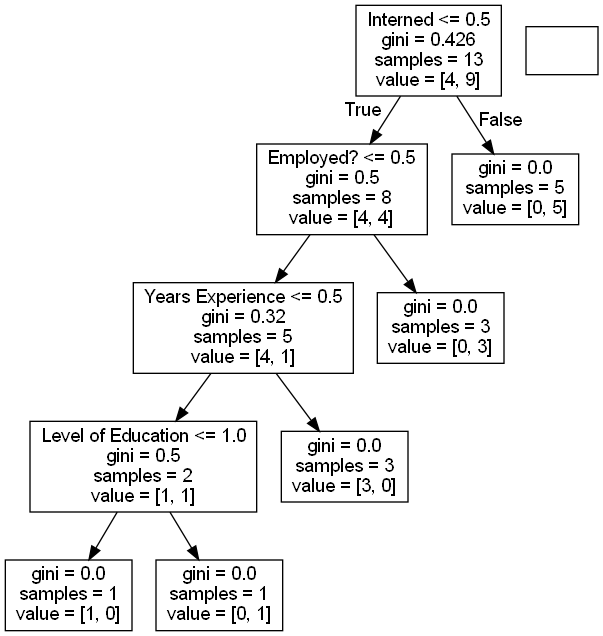

In [38]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier()
classifier1 = classifier1.fit(x,y)

print(classifier1.predict([[10,1,4,0,0,1]]))

C:\Users\adith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[10.  1.  4.  0.  0.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.